In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, LeaveOneOut
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv("heart_cleveland_upload.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [26]:
null_counts = df.isnull().sum()
null_counts

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [27]:
# Features and target
X = df.drop('condition', axis=1)
y = df['condition']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [29]:
def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, zero_division=0)
    }

results = {}

In [30]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
results['Hold-Out'] = evaluate(y_test, y_pred)

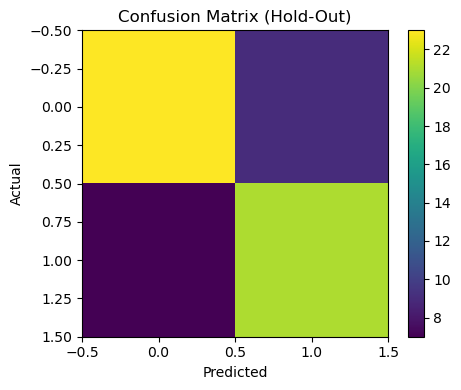

In [31]:
# Confusion matrix for hold-out
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix (Hold-Out)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.tight_layout()
plt.show()

In [32]:
# -------------------------------------------------------------------
# 2. K-Fold Validation
# -------------------------------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf_metrics = []

for train_idx, test_idx in kf.split(X):
    model = LogisticRegression(max_iter=2000)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred = model.predict(X.iloc[test_idx])
    kf_metrics.append(list(evaluate(y.iloc[test_idx], pred).values()))

results['K-Fold'] = dict(zip(
    ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    np.mean(kf_metrics, axis=0)
))


In [33]:
# -------------------------------------------------------------------
# 3. Stratified K-Fold Validation
# -------------------------------------------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skf_metrics = []

for train_idx, test_idx in skf.split(X, y):
    model = LogisticRegression(max_iter=2000)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred = model.predict(X.iloc[test_idx])
    skf_metrics.append(list(evaluate(y.iloc[test_idx], pred).values()))

results['Stratified K-Fold'] = dict(zip(
    ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    np.mean(skf_metrics, axis=0)
))

In [34]:
# -------------------------------------------------------------------
# 4. Leave-One-Out (LOO) Validation
# -------------------------------------------------------------------
loo = LeaveOneOut()
loo_metrics = []

for train_idx, test_idx in loo.split(X):
    model = LogisticRegression(max_iter=2000)
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    pred = model.predict(X.iloc[test_idx])
    loo_metrics.append(list(evaluate(y.iloc[test_idx], pred).values()))

results['Leave-One-Out'] = dict(zip(
    ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    np.mean(loo_metrics, axis=0)
))


In [35]:
# -------------------------------------------------------------------
# Display Results
# -------------------------------------------------------------------
results_df = pd.DataFrame(results).T
print("\nValidation Results:")
print(results_df)



Validation Results:
                   Accuracy  Precision    Recall  F1 Score
Hold-Out           0.733333   0.700000  0.750000  0.724138
K-Fold             0.838531   0.858528  0.794781  0.820959
Stratified K-Fold  0.842090   0.860272  0.796032  0.824350
Leave-One-Out      0.831650   0.360269  0.360269  0.360269


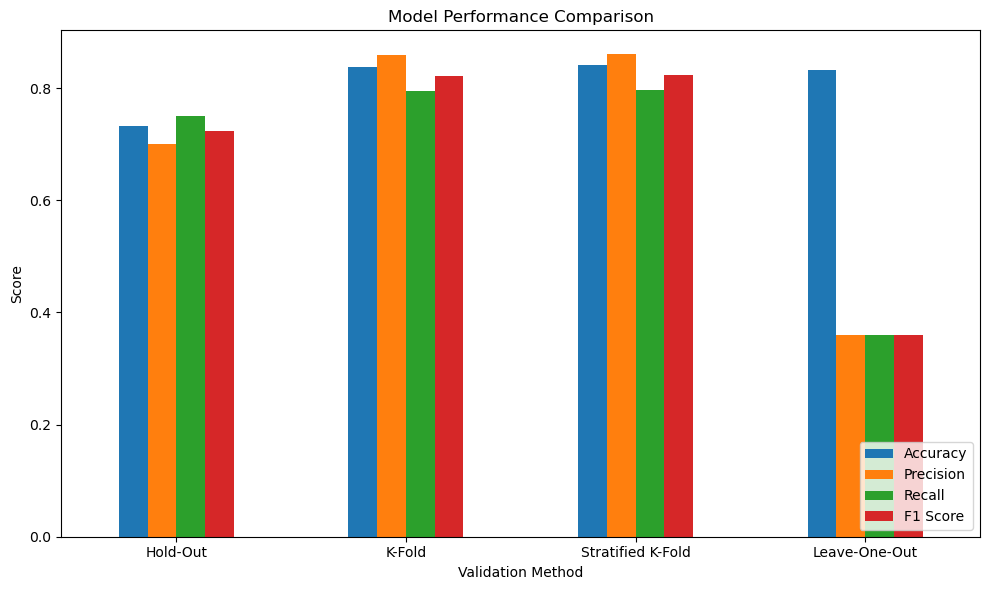

In [36]:
# -------------------------------------------------------------------
# Plot Comparison of Metrics
# -------------------------------------------------------------------
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.xlabel("Validation Method")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()